# Weather Forecasting using ARIMA TIME SERIES

In [24]:
import pandas as pd
import numpy as np

In [2]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [25]:
df=pd.read_csv("/Users/geethika/Downloads/ARIMA-Temperature_Forecasting-master/MaunaLoaDailyTemps.csv",
               index_col='DATE', parse_dates=True)

In [26]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [27]:
df.isnull().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [28]:
df=df.dropna()

In [29]:
df.isnull().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [30]:
df.shape

(1821, 5)

<AxesSubplot: xlabel='DATE'>

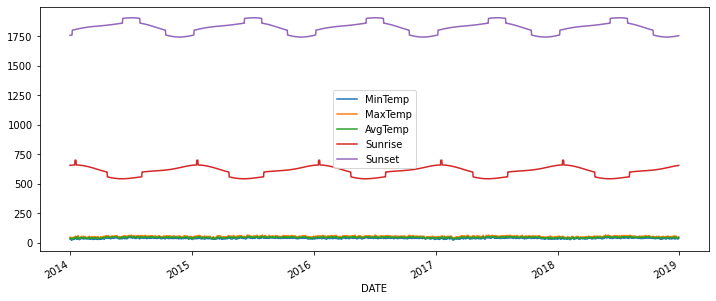

In [31]:
#ploting
df.plot(figsize=(12,5))

<AxesSubplot: xlabel='DATE'>

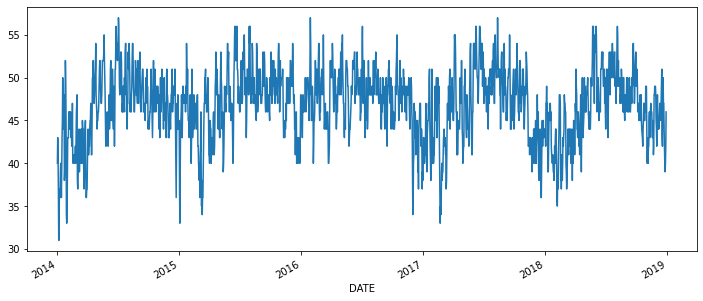

In [32]:
df['AvgTemp'].plot(figsize=(12,5))

# To check seasonarity , we perform ADG Fuller test

In [33]:

from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)

In [34]:
ad_test(df['AvgTemp'])

1. ADF :  -6.554680125068781
2. P-Value :  8.67593748019951e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


P is exponential val so small

If p< 0.05 ; Data is stationary

if p>0.05; Data is not stationary
 
stationary data should have a small p value. 
Larger p value could indicate presence of certain trends(varying mean) or seasonality as well.

# ARIMA
It is composed of 3 terms(Auto-Regression + Integrated+ Moving-Average)
 
y = mx + c ( similar to this)

AR yt= C1 + yt-1 * C2 + Error

MA yt= mean + error-1 * X2 + Error 


ARIMA (p,d,q) = mean + yt-1 * C2 + error-1 * X2 + Error new

In [35]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [36]:
stepwise_fit = auto_arima(df['AvgTemp'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.478
Date:                Fri, 31 Mar 2023   AIC                           8294.955
Time:                        11:24:18   BIC                           8339.012
Sample:                             0   HQIC                          8311.209
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2481      0.374      3.336      0.001       0.515       1.981
ar.L1          0.9732      0.008    120.765      0.000       0.957       0.989
ma.L1         -0.1225      0.024     -5.136      0.000      -0.169      -0.076
ma.L2         -0.2203      0.024     -9.083      0.000      -0.268      -0.173
ma.L3         -0.2028      0.024     -8.445      0.000      -0.250      -0.156
ma.L4         -0.1392      0.023     -6.089      0.000      -0.184      -0.094
ma.L5         -0.0516      0.025     -2.105      0.035      -0.100      -0.004
sigma2         5.5180      0.173     31.835      0.000       5.178       5.858
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.81
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['AvgTemp'], trace=True, # to print all the values while running
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.628, Time=0.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=0.70 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=0.87 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.309, Time=0.99 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8318.373, Time=1.04 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.192, Time=0.96 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.870, Time=1.21 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.154, Time=1.31 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.684, Time=1.44 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.693, Time=1.35 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

We can see the best ARIMA model seems to be of the order (1,0,5) with the minimum AIC score=8294.785

# Split Your Dataset

In [38]:
print(df.shape)

(1821, 5)


In [39]:
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1791, 5) (30, 5)
MinTemp      36.0
MaxTemp      52.0
AvgTemp      44.0
Sunrise     640.0
Sunset     1743.0
Name: 2018-12-01 00:00:00, dtype: float64 MinTemp      39.0
MaxTemp      52.0
AvgTemp      46.0
Sunrise     656.0
Sunset     1754.0
Name: 2018-12-30 00:00:00, dtype: float64


# On train data

In [40]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Fri, 31 Mar 2023   AIC                           8156.395
Time:                        11:24:35   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Check How Good Your Model Is ( use Test dataset)

In [19]:
import matplotlib.pyplot

In [21]:
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


<AxesSubplot: xlabel='DATE'>

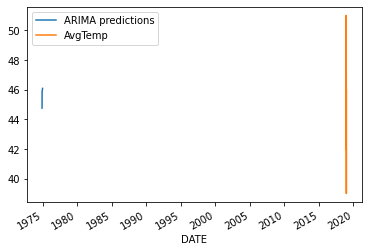

In [46]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

<AxesSubplot: xlabel='DATE'>

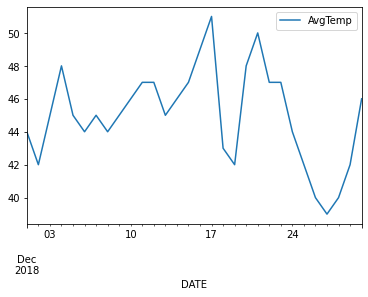

In [21]:
test['AvgTemp'].plot(legend= True)

In [23]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)

NameError: name 'pred' is not defined

# RMSE 


In [42]:
test['AvgTemp'].mean()

45.0

In [26]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463970952195


If both mean ans rmse are in similar range -> bad model
So, this is a good model

In [43]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

#to check the last 5 elements for the last date

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


to predict after 30th dec

In [44]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29') #to index date
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136667
2019-01-05    45.156141
2019-01-06    45.175342
2019-01-07    45.194275
2019-01-08    45.212943
2019-01-09    45.231350
2019-01-10    45.249500
2019-01-11    45.267395
2019-01-12    45.285040
2019-01-13    45.302438
2019-01-14    45.319593
2019-01-15    45.336507
2019-01-16    45.353185
2019-01-17    45.369630
2019-01-18    45.385844
2019-01-19    45.401832
2019-01-20    45.417596
2019-01-21    45.433139
2019-01-22    45.448465
2019-01-23    45.463576
2019-01-24    45.478476
2019-01-25    45.493168
2019-01-26    45.507654
2019-01-27    45.521937
2019-01-28    45.536020
2019-01-29    45.549906
Freq: D, Name: ARIMA Predictions, dtype: float64


<AxesSubplot: >

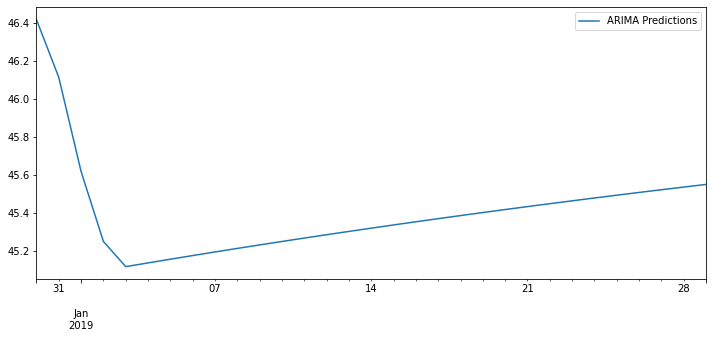

In [29]:
pred.plot(figsize=(12,5),legend=True)
